In [35]:
import tensorflow as tf  
from tensorflow.keras.optimizers import RMSprop #menggunakan optimizer RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator #menggunakan augmented gambar

In [36]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip #mempersiapkan dataset

--2021-07-06 04:55:32--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  17.4MB/s    in 17s     

2021-07-06 04:55:50 (18.0 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [39]:
# ektraksi file zip rockpaperscissors
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/rockpaperscissors/rps-cv-images'


In [40]:
os.listdir(base_dir)

['paper', 'scissors', 'rock', 'README_rpc-cv-images.txt']

In [41]:
#augmentasi gambar
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split=0.4)

In [42]:
#mempersiapkan data latih
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150), 
        #class_mode='sparse',
        shuffle=True,
        subset='training')
 
validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(100, 150),
        #class_mode='sparse',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [43]:
#menggunakan model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [44]:
# compile model menggunakan 'RMSprop' optimizer loss function 'categorical_crossentropy' 
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [45]:
#latih model
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 17s - loss: 1.2007 - accuracy: 0.4545 - val_loss: 0.8931 - val_accuracy: 0.6125
Epoch 2/20
25/25 - 16s - loss: 0.7216 - accuracy: 0.7312 - val_loss: 0.4959 - val_accuracy: 0.8000
Epoch 3/20
25/25 - 16s - loss: 0.5029 - accuracy: 0.8260 - val_loss: 0.4205 - val_accuracy: 0.8250
Epoch 4/20
25/25 - 16s - loss: 0.3337 - accuracy: 0.8740 - val_loss: 0.2636 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 16s - loss: 0.2945 - accuracy: 0.8961 - val_loss: 0.2573 - val_accuracy: 0.8875
Epoch 6/20
25/25 - 16s - loss: 0.2899 - accuracy: 0.9025 - val_loss: 0.2400 - val_accuracy: 0.9062
Epoch 7/20
25/25 - 16s - loss: 0.2137 - accuracy: 0.9200 - val_loss: 0.2012 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 16s - loss: 0.2319 - accuracy: 0.9247 - val_loss: 0.1896 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 16s - loss: 0.2192 - accuracy: 0.9312 - val_loss: 0.2097 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 16s - loss: 0.1507 - accuracy: 0.9506 - val_loss: 0.2974 - val_accuracy: 0.9125
Epoch 11/

Saving 1fKclJk4eBWOQSR1.png to 1fKclJk4eBWOQSR1.png
1fKclJk4eBWOQSR1.png
paper


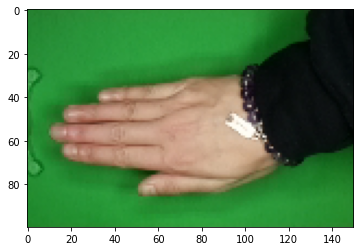

In [46]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('paper')
  elif classes[0][1]==1:
    print('rock')
  elif classes[0][2]==1:
    print('scissors')
  else:
    print('unknown')